In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df.drop('Outcome',axis=1)
y = df.Outcome

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
model = DecisionTreeClassifier()

model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 67.53246753246754


In [ ]:
confusion_matrix(y_test,y_pred)

array([[76, 23],
       [27, 28]])

In [ ]:
print("Accuracy:",(78+32)/(78+21+23+32))

Accuracy: 0.7142857142857143


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        99
           1       0.55      0.51      0.53        55

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



In [ ]:
model.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
feature = x.columns
feature

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

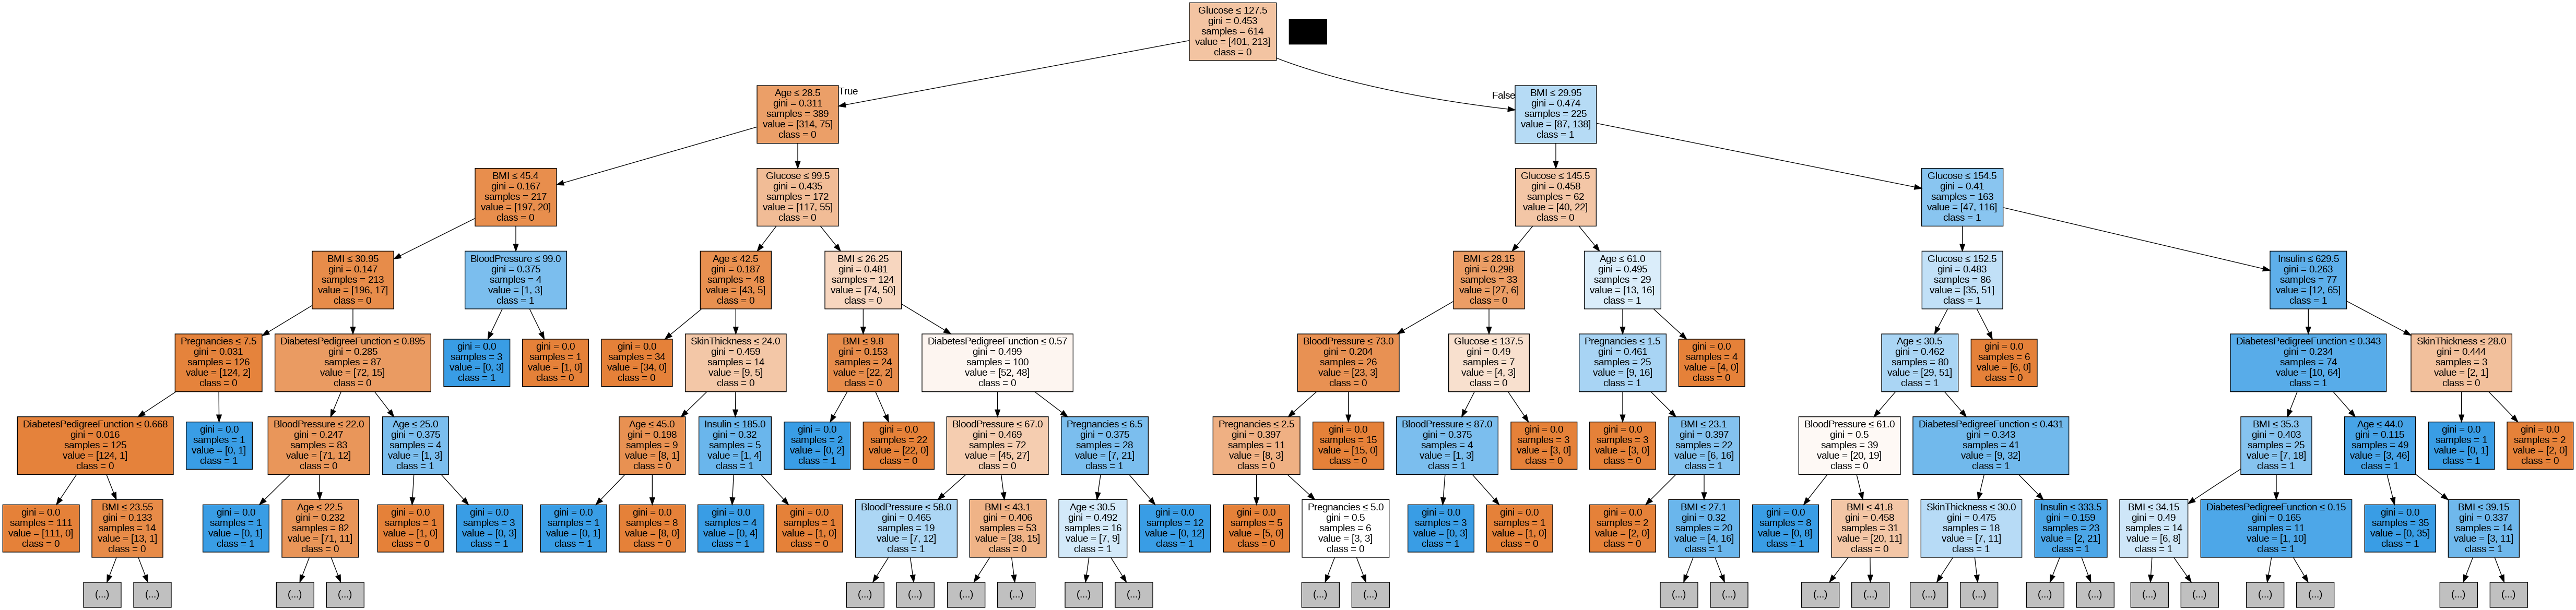

In [ ]:
#Model based on GINI

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True,special_characters=True,feature_names = feature,class_names=['0','1'],max_depth=6)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [ ]:
#Model based on Entropy

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


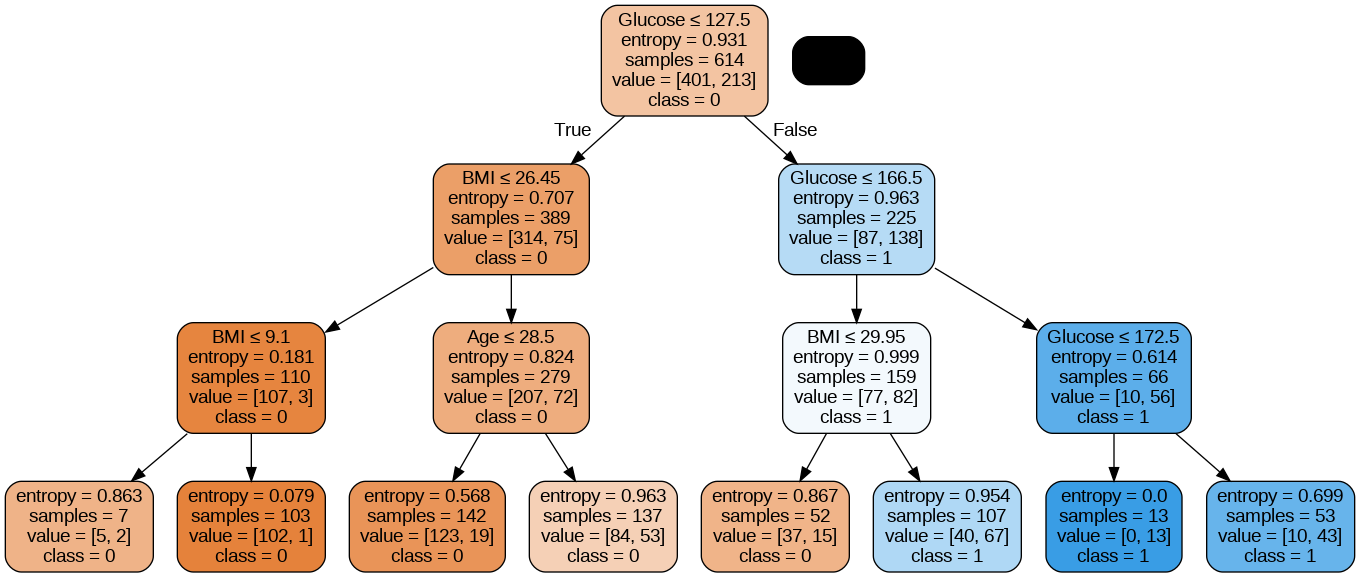

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())